In [38]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

%matplotlib notebook

from run_utils import run_env_experiment, plot_ratings_mses

sys.path.append('/home/ec2-user/mcurmei/recsys-eval/')
from reclab.recommenders import LibFM
from reclab.environments.topics import Topics
from reclab.environments.latent_factors import LatentFactorBehavior

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
expdirname = 'dynamic_user_static_rec'

## Setup the test environment ##

num_users = 100
num_items = 170
num_init_ratings = 1000
env_params = {
    'rating_frequency': 0.2,
    'num_init_ratings': num_init_ratings,
    'num_users': num_users,
    'num_items': num_items,
}

envs = [Topics(**env_params, num_topics=5),
        LatentFactorBehavior(**env_params, latent_dim=8)]
env_names=['Topics_u-{}_i-{}_r-{}'.format(num_users, num_items, num_init_ratings),
          'LatentFactorBehavior_u-{}_i-{}_r-{}'.format(num_users, num_items, num_init_ratings)]                              

In [43]:

## Setup the recommenders ##
    
recs = [LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='sgd',
        learning_rate=0.03,
        bias_reg=0.1,
        one_way_reg=0.1,
        two_way_reg=0.1,
        use_global_bias=True,
        use_one_way=True,
        ),       
        LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='sgd',
        learning_rate=0.03,
        one_way_reg=0.1,
        two_way_reg=0.1,
        use_global_bias=False,
        use_one_way=True,
    ),
        LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='sgd',
        learning_rate=0.03,
        bias_reg=0.1,
        use_global_bias=True,
        use_one_way=False,
    ),
        LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='sgd',
        learning_rate=0.03,
        two_way_reg=0.1,
        use_global_bias=False,
        use_one_way=False,
    ),        
]

rec_names = ['LibFM', 'LibFM_no_global_bias', 'LibFM_no_1way_bias', 'LibFM_no_bias']

In [50]:
## Setup the trial ##
len_trial = 200
n_trials = 5
trial_seeds = [i for i in range(n_trials)]
data_dir = 'Mihaela'
bucket_name = 'recsys-eval'

ratings, preds, dense_ratings, dense_preds = run_env_experiment(environments=envs,
                                                                recommenders=recs,
                                                                trial_seeds=trial_seeds,
                                                                len_trial=len_trial,
                                                                environment_names=env_names,
                                                                recommender_names=rec_names,
                                                                bucket_name=bucket_name,
                                                                data_dir=data_dir,
                                                                overwrite=False)

Started experiments on environment: Topics_u-100_i-170_r-1000
Running trials for recommender: LibFM
Running trial with seed: 0
Loading past results from S3 at directory: Mihaela/Topics_u-100_i-170_r-1000/LibFM/trials/seed_0/
Running trial with seed: 1
Loading past results from S3 at directory: Mihaela/Topics_u-100_i-170_r-1000/LibFM/trials/seed_1/
Running trial with seed: 2
Loading past results from S3 at directory: Mihaela/Topics_u-100_i-170_r-1000/LibFM/trials/seed_2/
Running trial with seed: 3
Loading past results from S3 at directory: Mihaela/Topics_u-100_i-170_r-1000/LibFM/trials/seed_3/
Running trial with seed: 4
Loading past results from S3 at directory: Mihaela/Topics_u-100_i-170_r-1000/LibFM/trials/seed_4/
Running trials for recommender: LibFM_no_global_bias
Running trial with seed: 0
Loading past results from S3 at directory: Mihaela/Topics_u-100_i-170_r-1000/LibFM_no_global_bias/trials/seed_0/
Running trial with seed: 1
Loading past results from S3 at directory: Mihaela/Topi


Saving results to S3.
Running trial with seed: 1



Saving results to S3.
Running trial with seed: 2



Saving results to S3.
Running trial with seed: 3



Saving results to S3.
Running trial with seed: 4



Saving results to S3.
Running trials for recommender: LibFM_no_global_bias
Running trial with seed: 0



Saving results to S3.
Running trial with seed: 1



Saving results to S3.
Running trial with seed: 2



Saving results to S3.
Running trial with seed: 3



Saving results to S3.
Running trial with seed: 4



Saving results to S3.
Running trials for recommender: LibFM_no_1way_bias
Running trial with seed: 0



Saving results to S3.
Running trial with seed: 1



Saving results to S3.
Running trial with seed: 2



Saving results to S3.
Running trial with seed: 3



Saving results to S3.
Running trial with seed: 4



Saving results to S3.
Running trials for recommender: LibFM_no_bias
Running trial with seed: 0



Saving results to S3.
Running trial with seed: 1



Saving results to S3.
Running trial with seed: 2



Saving results to S3.
Running trial with seed: 3



Saving results to S3.
Running trial with seed: 4



Saving results to S3.


### LibFM with different settings on topics

<IPython.core.display.Javascript object>


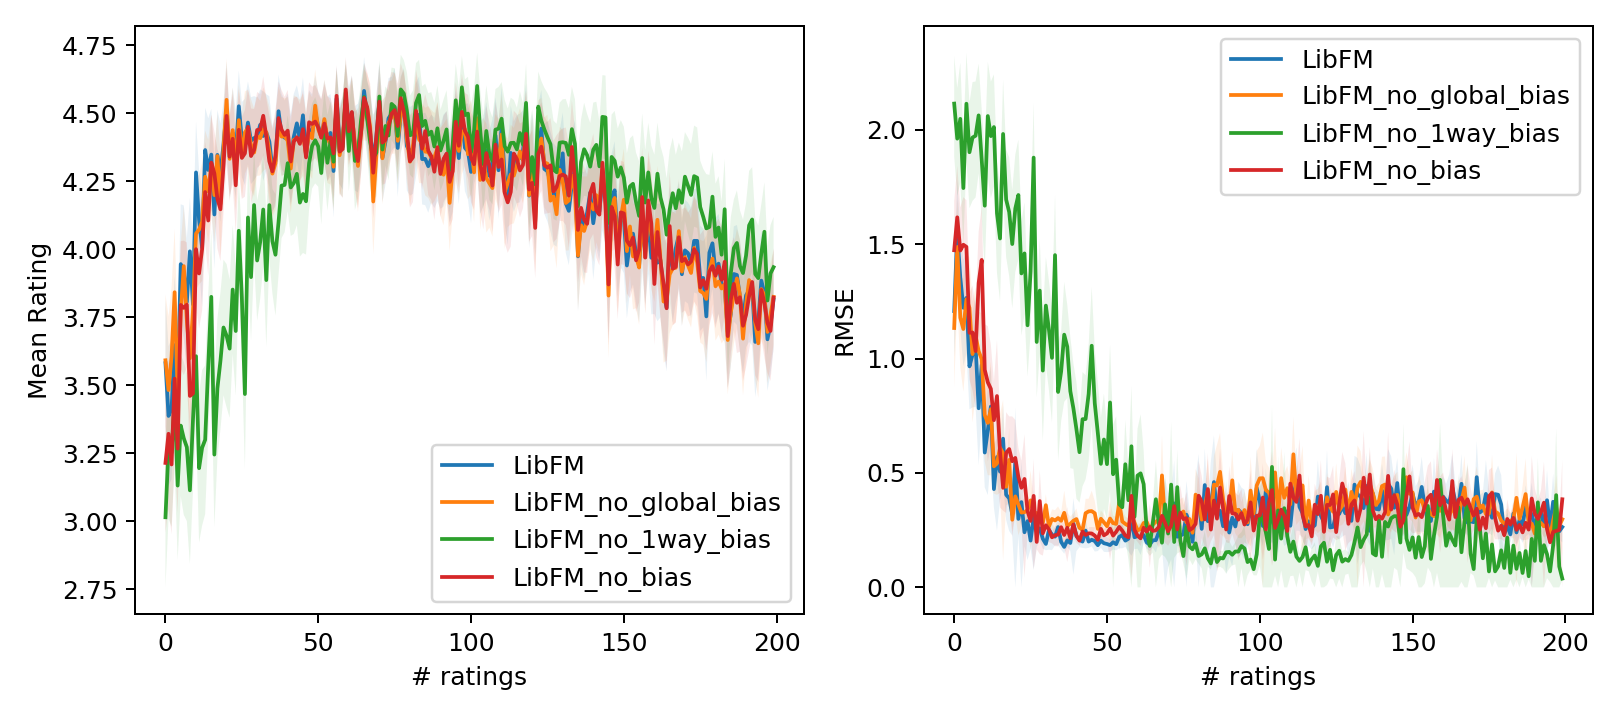

In [51]:
plot_ratings_mses(ratings[0], preds[0], rec_names)

<IPython.core.display.Javascript object>


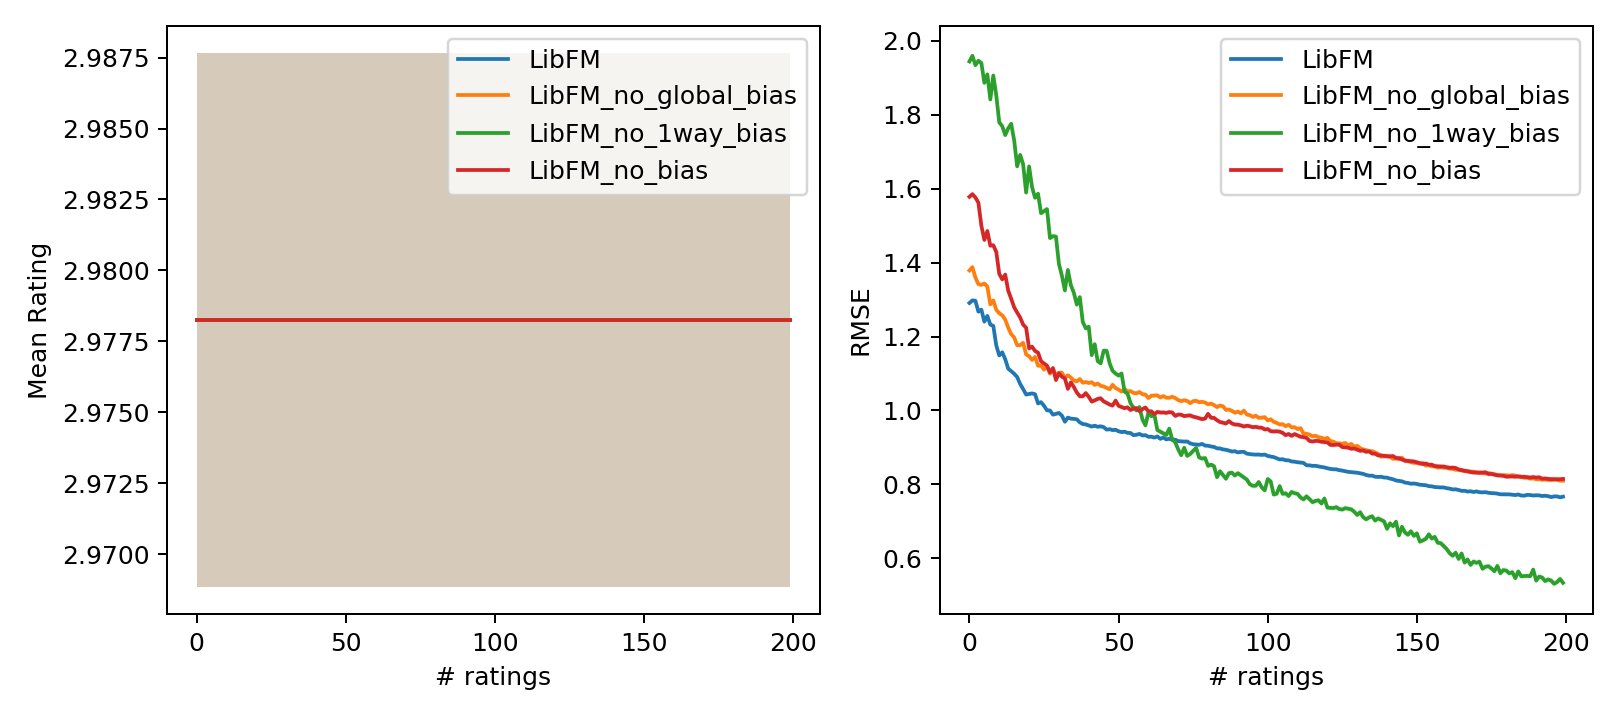

In [52]:

plot_ratings_mses(dense_ratings[0], dense_preds[0], rec_names)

## LibFM with different settings on LatentFactor behaviour

<IPython.core.display.Javascript object>


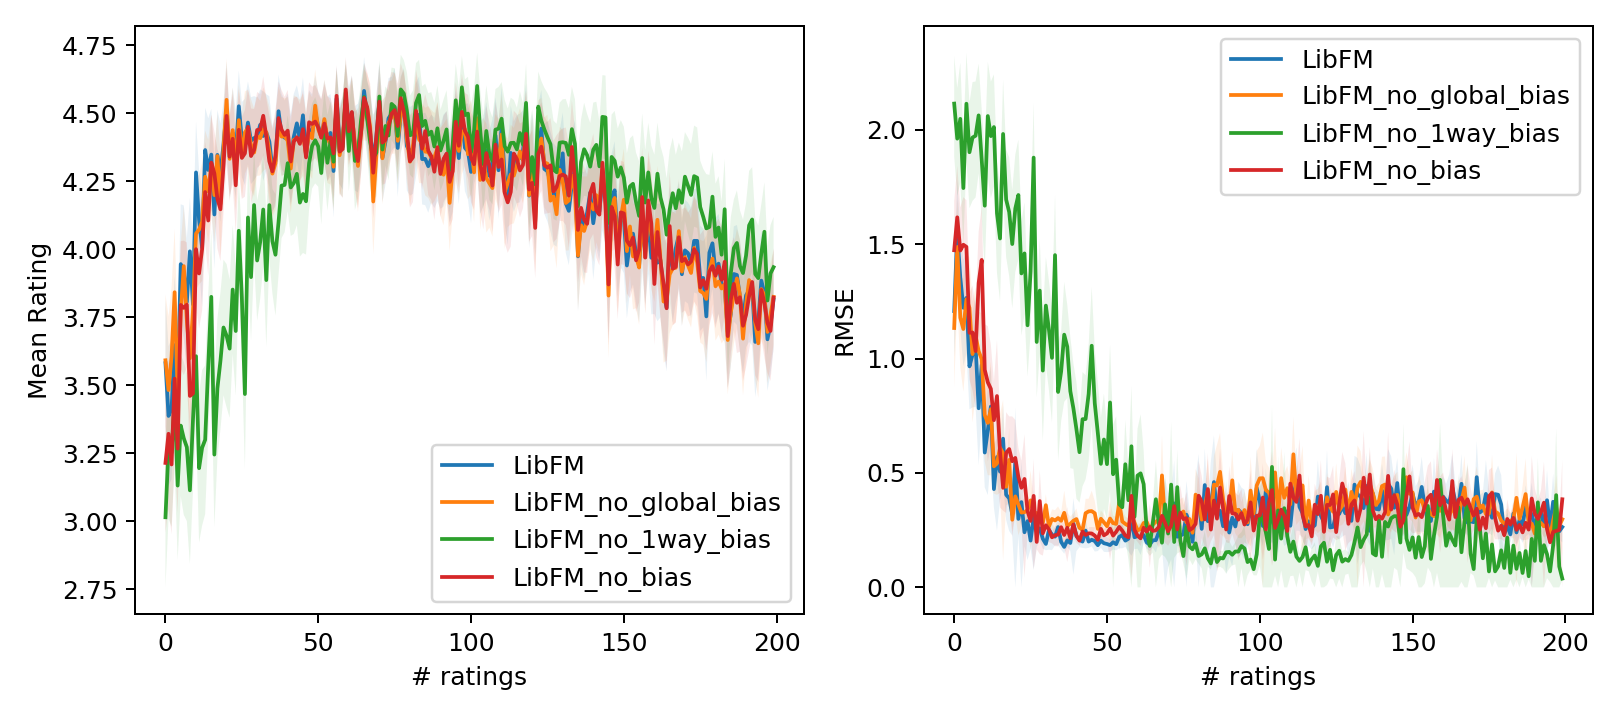

In [53]:
plot_ratings_mses(ratings[0], preds[0], rec_names)

<IPython.core.display.Javascript object>


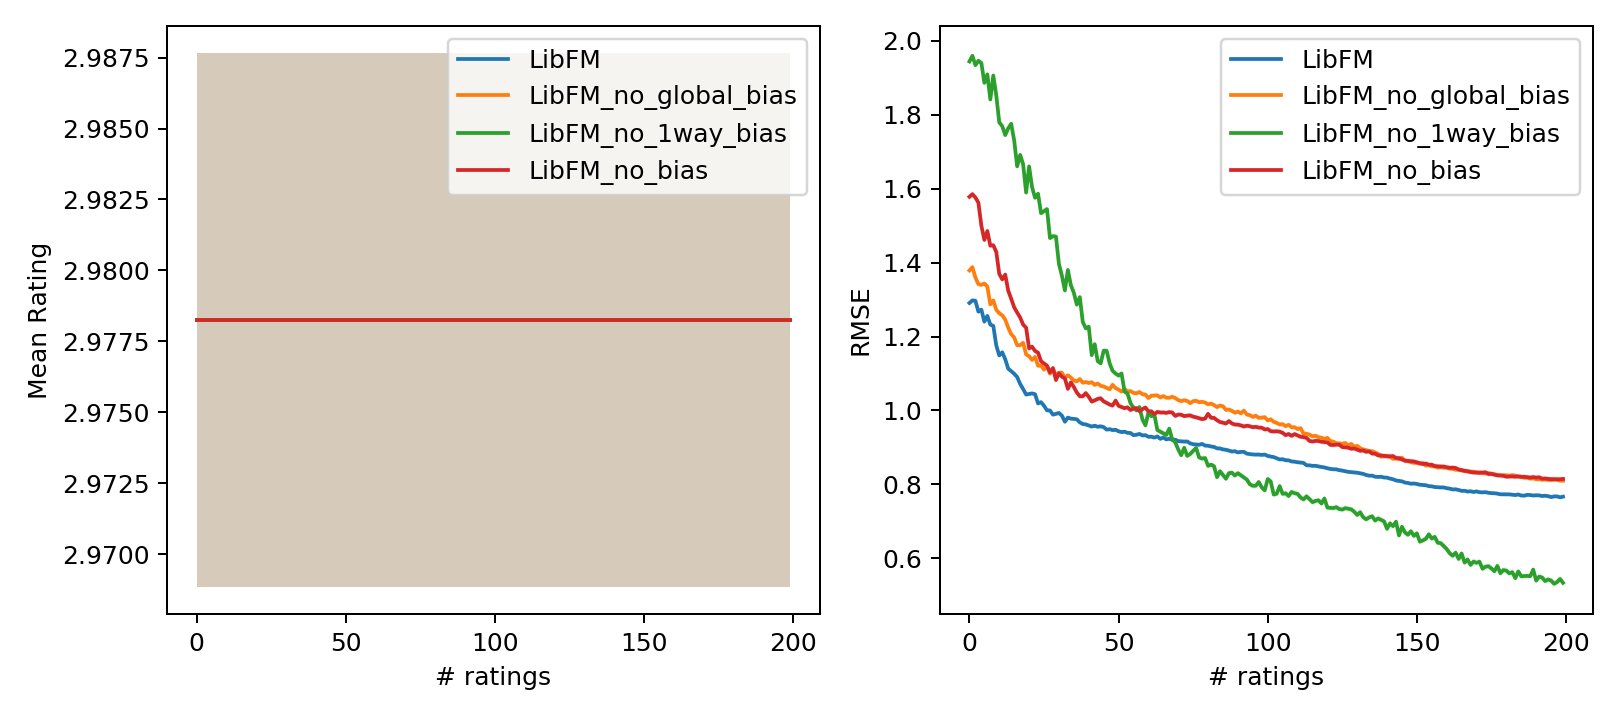

In [54]:
plot_ratings_mses(dense_ratings[0], dense_preds[0], rec_names)